In [3]:
import sys
sys.path.append('d:/portfolio/Generalized-Linear-Models/src')

from data_loader import load_pima_data

In [6]:
data = load_pima_data('D:\portfolio\Generalized-Linear-Models\data\pima_diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#nul values in each column
null_counts = data.isnull().sum()
print(null_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


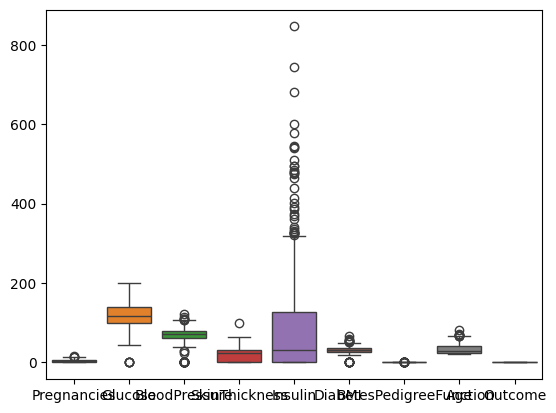

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data)
plt.show()

In [12]:
#calculating outliers using z-score
from scipy.stats import zscore
import numpy as np

z_scores = zscore(data.select_dtypes(include=[float, int]))
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
print(data[outliers])


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
13             1      189             60             23      846  30.1   
..           ...      ...            ...            ...      ...   ...   
695            7      142             90             24      480  30.4   
697            0       99              0              0        0  25.0   
703            2      129              0              0        0  38.5   
706           10      115              0              0        0   0.0   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
7                  

In [14]:
#calculating outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

print(data[outliers.any(axis=1)])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
706           10      115              0              0        0   0.0   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
7                  

Outcome
0    500
1    268
Name: count, dtype: int64


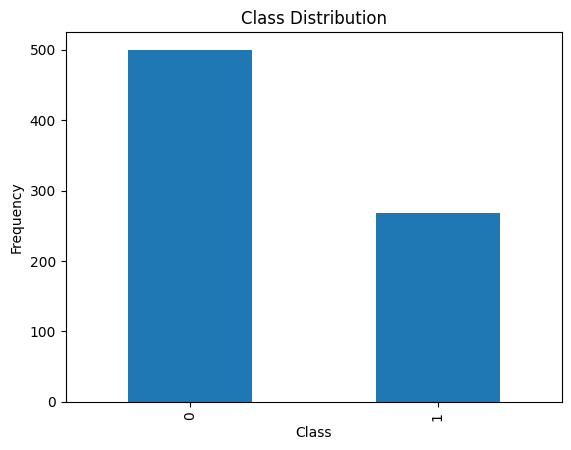

In [15]:
class_counts = data['Outcome'].value_counts()

print(class_counts)

class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()